# 14 有监督学习 —— 决策树
- 几个有趣的例子：找对象，要不要逃课，吃瓜,十三问

- 内容
    - 决策树、决策树学习、决策树算法 ......
    - 基于决策树的 Titanic 号乘客生还预测
    - 其他例子

## 14.1 决策树的数学原理


- 决策树方法在分类、预测等领域有广泛的应用，在机器学习研究者Quinlan提出ID3算法之后，决策树在机器学习、数据挖掘领域得到极大的发展。
- D3算法：该算法是以信息论为基础，以信息熵和信息增益为衡量标准，从而实现对数据的归纳分类。根据信息论理论，采用划分后样本集的不确定性作为衡量划分好坏的标准，用信息增益度量不确定性：信息增益越大，不确定性越小



#### 什么是信息熵?
- 香农提出的，为解决信息的量化问题，一条信息的信息量和他的不确定性有直接关系，一个问题不确定性越大，要搞清楚这个问题就需要了解更多的信息，其信息熵就越大，对于任意一个随机变量X，它的信息熵定义如下，单位为比特(bit)，计算公式为：
$$H(X)=-\sum_{x\in X}^{}P(x)log(P(x))$$

其中$P(x)$表示事件x出现的概率

#### 例1
如：一个盒子中分别有5个白球和5个红球，随机取出一个球，问，这个球是红色还是白色？这个问题信息量多大呢？由于红球和白球出现的概率都是1/2，那么久可以得到其信息熵为：$H(x)=-(1/2log2(1/2)+1/2log2(1/2))=1$，是的，这个信息量是1bit。

如果一个盒子里有10个红球，随机取出一个，这个球什么颜色？这个问题的信息量是多少？信息量是0，因为这是一个确定事件，概率$P(x)$=1.  
信息熵其实是一个随机变量信息量的数学期望。

如：色子，$H(x)=-(1/6log(1/6))\times6 = 2.5849\times1/6\times6 = 2.5849$

#### 例2 销量分析

|序号|天气|是否周末|是否促销|销量|
|-|-|-|-|-|
|1|坏|是|是|高|
|2|坏|是|是|高|
|3|坏|否|是|高|
|...|...|...|...|...|
|33|好|否|否|低|
|34|好|否|否|低|

- 计算总信息熵。数据记录34条，销量为高的有18条，为低的16条  
- 总信息熵H(x)=-(18/34)*log2(18/34)-(16/34)*log2(16/34)=0.997503
- 计算各个属性的信息熵
   - 对于天气，属性值有好与坏，其中好天气下，销量为高的记录11条，为低的记录6条
       - 在坏天气下，销量为高记录7条，为低的记录10条  
       - H(天气=好)= -(11/17)*log2(11/17)-(6/17)*log2(6/17)=0.936667  
       - H(天气=坏)= -(7/17)*log2(7/17)-(10/17)*log2(10/17)=0.977418  
       - H(天气)=(17/34)* H(天气=好)+(17/34)* H(天气=坏) = 0.957043
   - 对于是否周末，属性值有是与否，其中是周末下，销量为高的记录11条，为低的记录3条
       - 在否周末下，销量为高记录7条，为低的记录13条  
       - H(周末=是)= -(11/14)*log2(11/14)-(3/14)*log2(3/14)=0.749595  
       - H(周末=否)= -(7/20)*log2(7/20)-(13/20)*log2(13/20)=0.934068  
       - H(周末)=(14/34)* H(周末=是)+(10/34)* H(周末=否) = 0.858109
   - 对于是否促销，属性值有是与否，其中促销下，销量为高的记录15条，为低的记录7条
       - 在否促销下，销量为高记录3条，为低的记录9条
       - H(促销=是)= -(15/22)*log2(15/22)-(7/22)*log2(7/22)=0.902393
       - H(促销=否)= -(3/12)*log2(3/12)-(9/12)*log2(9/12)=0.811278
       - H(促销)=(22/34)* H(促销=是)+(12/34)* H(促销=否) = 0.870235

- 计算天气，是否周末，是否促销的信息增益值
    - Gain(天气)= H(x)- H(天气)=0.04046
    - Gain(是否周末)= H(x)- H(周末)=0.139394 
    - Gain(是否促销)= H(x)- H(促销) = 0.127268,4
- 很直观得到“是否周末”信息增益最大！！！

- 由上步可知，是否周末的信息增益最大，他的两个属性'是'，'否'作为跟结点的两个分支，

- 然后从未被选择的特征中继续进行一至三步，选择最优数据划分特征来划分子数据集，

- 何时停止？一是一直到所有的特征都用完了，二是划分后额信息增益足够小，就可以停止了，最终构成一颗决策树

<img src="images\ch14\tree.jpg" width=400> 

#### 信息熵与概率的关系图
<img src="images\ch14\shang01.jpg" width=400> 
- 可以看出，当概率$P(x)$越接近0或者1是，信息熵越小，其不确定性越小，即数据越纯，我们在选择特征时，选择信息增益最大的特征，即，让数据尽量往更纯净的方向上变换，因此，信息增益是用来衡量数据变得更有序、更纯净的指标。

#### 数据离散化

- 如果一个特征时连续值怎么办？此时需要进行离散化，对连续数据进行离散化处理，比如：

- 当成绩大于90标识为优，当成绩大于70小于90，标识为良，当成绩大于60小于70，标识为及格，当成绩小于60标识为不及格

经过离散化处理就可以构建决策树了

#### 正则项

- 信息增益的一个大问题就是容易造成偏向选择分支多的属性导致
- 例如：某个产品的唯一标识符ID作为特征之一加入到数据集中，那么构建决策树时，就会优先选择产品ID来作为划分特征，因为这样划分出来的数据，每个叶子节点只有一个样本，划分后的子数据集最“纯净”，其信息增益最大。（不是我们想要的）
- 那么我们能想到的解决办法就是加上一个与类别个数成正比的正则项来作为最终的信息熵
- 这样当算法选择的某个类别较多的特征，是信息熵较小的时候，受到正则项的惩罚，最终导致信息熵也比较大
- 这样通过合适的参数，可以是算法训练得到平衡
- 另外一个解决办法是使用信息增益比来作为特征选择的标准，就是特征的增益值除以特征熵，可以解决优先选取类别多的特征的问题，这就是C4.5算法构建标准。

#### 基尼不纯度

- 信息熵是衡量信息不确定性的指标，实际上是衡量信息纯度的指标
- 除此之外，基尼不纯度也是衡量信息不纯度的指标，公式如下：
$$Gini(D)=1-\sum_{i=1}^{n}p_i^2$$

<img src="images\ch14\shang02.jpg" width=400> 

可以看出，其形状和信息熵的几乎一样

基本概念就讲这些。

## 14.2 决策树


- 有监督学习分类识别方法之一

### 14.2.1 决策树的基本概念


- 决策树 —— 从数据产生决策树的机器学习技术叫做决策树学习，简称决策树
    - 一种决策支持工具，或称预测模型
    - 代表对象属性与对象值之间的一种映射关系


- 特点
    - 利用像树一样的图形或决策模型来进行决策
    

- 示例 —— 吃瓜决策树

<img src="images/ch14/melon_decision_tree_fig.jpg" width="450">

### 14.2.2 节点与分支


- 内部节点 —— 一个特征属性的测试
- 分支 —— 测试输出
- 叶节点 —— 一种类别

### 14.2.3 决策树算法流程


(1) 收集数据

(2) 数据处理 —— 连续型数据须离散化

(3) 分析数据 —— 重要的环节

(4) 训练算法 —— 构造树的数据结构

(5) 测试算法 —— 检验算法，计算错误率

(6) 预测实用

### 14.2.4 简单示例 —— 网球训练的决策问题


- 问题背景
    - 网球场希望根据打网球的人数来安排合适的工作人数
    - 但是打网球的人数受多种因素影响
    - 该如何根据各种因素变化安排适当人手呢？


- 也适用于
    - 俱乐部如何安排训练
    - 网球爱好者活动计划


- 数据
    - 特征 —— 天气、温度、湿度、风等
    - 目标 —— 是否打球


- 利用决策树模型 —— 过程略

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/tennis.csv')
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


#### 决策树

<img src="images/ch14/tennis.png" width=400>

## 14.3 基于决策树的 Titanic 号乘客生还预测


- 判断 Titanic 号乘客能否生还？

<img src="images\ch14\titanic01.jpg" width= 400>

- 《泰坦尼克号》，由詹姆斯·卡梅隆执导，莱昂纳多·迪卡普里奥、凯特·温斯莱特领衔主演。
- 1997年12月19日在美国上映，1998年4月3日在中国在内地上映，2012年4月10日以3D版在中国内地重映
<img src="images\ch14\titanic02.jpg" width= 400>

### 14.3.1 问题简介


- 时间：1912年4月14日深夜至15日凌晨
- 地点：北大西洋
- 事由：泰坦尼克号从英国南安普敦港至美国纽约港首航的第5天，1912年4月14日星期天23时40分与一座冰山相撞，因此沉没
- 损失：1514人死亡

- Titanic 号航线与出事地点


<img src="images/ch14/900px-TitanicRoute(zh).png" width="800">

### 14.3.2 撞冰山之后发生的事 —— 生还的关键


- 船长爱德华·约翰·史密斯命令开放救生艇并召集乘客疏散
    - 服务员们逐一敲门唤醒正在睡觉的乘客和船员，告诉他们前往小艇甲板
    - 召集人员的完整度在很大程度上取决于该类乘客的消费等级


- 客舱等级、服务员行为、乘客反应
    - 头等舱的服务员只负责管理一些套房，可协助高级乘客穿上救生衣并将其带领到小艇甲板上
    - 二、三等舱服务员大多疲于奔命，只来得及叫开房门，告知乘客穿上救生衣然后自己想办法上楼
    - 三等舱大部分乘客利用宝贵的逃生时间打包自己的行李
    - 许多乘客和船员不愿意遵守船长的召集命令
    - 一些人拒绝相信船有问题
    - 一些人宁愿待在温暖的房间里
    - 10分钟后，服务员们开始强制命令乘客穿上他们的救生衣，但许多乘客当着玩笑


<img src="images/ch14/Titanic_structure_zh.png" width="1200">

- 距离救生艇远近的影响
    - 与救生艇的距离远近成为生还机率的关键因素
    - 头等舱套房位于上甲板右舷，离救生艇最近
    - 位于C层至G层甲板上的三等舱客房，那里是泰坦尼克号的最末端，离救生艇最远


<img src="images/ch14/RMS_Titanic_boat_deck_plan_zh.png" width="600">

   - 2224名船员及乘客中，1517人丧生，

- 可怜的三等舱
    - 绝大多数登上救生艇的乘客都来自头等舱和二等舱，救生小艇甲板上几乎看不见三等舱乘客的身影
    - 在泰坦尼克号上，显然有某些地方特意阻碍了三等舱乘客的逃生路线，一些障碍和通道（如铁门、舷梯、电梯）被船员锁上、封闭或派人看守，避免他们抢先搭乘救生艇
    

- 会说英语的影响
    - 许多三等舱乘客看不懂或不会说英语，因此会英语的爱尔兰移民在三等舱乘客之中，具有特别高的幸存比例


- 优先待遇
    - 船长命令：“让妇女和儿童登艇撤离”

### 14.3.3 泰坦尼克号乘客数据集

- [下载地址](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.txt)
- [本地数据](data/titanic.csv)

In [3]:
# 初识数据
!type data\titanic.csv

"row.names","pclass","survived","name","age","embarked","home.dest","room","ticket","boat","sex"
"1","1st",1,"Allen, Miss Elisabeth Walton",29.0000,"Southampton","St Louis, MO","B-5","24160 L221","2","female"
"2","1st",0,"Allison, Miss Helen Loraine", 2.0000,"Southampton","Montreal, PQ / Chesterville, ON","C26","","","female"
"3","1st",0,"Allison, Mr Hudson Joshua Creighton",30.0000,"Southampton","Montreal, PQ / Chesterville, ON","C26","","(135)","male"
"4","1st",0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,"Southampton","Montreal, PQ / Chesterville, ON","C26","","","female"
"5","1st",1,"Allison, Master Hudson Trevor", 0.9167,"Southampton","Montreal, PQ / Chesterville, ON","C22","","11","male"
"6","1st",1,"Anderson, Mr Harry",47.0000,"Southampton","New York, NY","E-12","","3","male"
"7","1st",1,"Andrews, Miss Kornelia Theodosia",63.0000,"Southampton","Hudson, NY","D-7","13502 L77","10","female"
"8","1st",0,"Andrews, Mr Thomas, jr",39.0000,"Southampton","Belfast, NI","A-3

### 14.3.4 准备工作 —— 导入必要的模块

- numpy
- scikit-learn
- matplotlib、pyplot
- 等

In [4]:
import IPython
import sklearn as sk
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pydot  #pydot可以直接可视化出来决策树的模型
import pyparsing #可以被用来解析简单的名字字符串或代数表达式,同时也可以从复杂格式文本报告中提取数据
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree, datasets

print ('IPython version:', IPython.__version__)
print ('numpy version:', np.__version__)
print ('scikit-learn version:', sk.__version__)
print ('matplotlib version:', matplotlib.__version__)
print ('pydot version:', pydot.__version__)
print ('pyparsing version:', pyparsing.__version__)

IPython version: 7.8.0
numpy version: 1.16.6
scikit-learn version: 0.24.1
matplotlib version: 3.1.1
pydot version: 1.4.2
pyparsing version: 2.4.2


### 14.3.5 数据加载与预处理（Loading & Preprocessing）

#### (1) 加载数据

- 属性
    - Ordinal
    - Class
    - Survived (0=no, 1=yes)
    - Name
    - Age
    - Port of Embarkation
    - Home/Destination
    - Room
    - Ticket
    - Boat
    - Sex


- 数据集文件为
    - [data/titanic.csv](data/titanic.csv)

#### (2) 加载代码

In [5]:
import csv

with open('data/titanic.csv', 'r') as csvfile:
    titanic_reader = csv.reader(csvfile, delimiter=',', quotechar='"')
    
    titanic_X, titanic_y = [], []

    for row in titanic_reader:
        titanic_X.append(row)
        titanic_y.append(row[2]) # The target value is "survived"
        
    feature_names = np.array(titanic_X[0])

    titanic_X = np.array(titanic_X[1:])
    titanic_y = np.array(titanic_y[1:])

print(feature_names)

['row.names' 'pclass' 'survived' 'name' 'age' 'embarked' 'home.dest'
 'room' 'ticket' 'boat' 'sex']


In [6]:
print(titanic_X)

[['1' '1st' '1' ... '24160 L221' '2' 'female']
 ['2' '1st' '0' ... '' '' 'female']
 ['3' '1st' '0' ... '' '(135)' 'male']
 ...
 ['1311' '3rd' '0' ... '' '' 'male']
 ['1312' '3rd' '0' ... '' '' 'female']
 ['1313' '3rd' '0' ... '' '' 'male']]


In [7]:
print(titanic_y)

['1' '0' '0' ... '0' '0' '0']


In [8]:
dir(titanic_reader)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'dialect',
 'line_num']

#### (3) 检查数据

In [9]:
print (feature_names, titanic_X[0], titanic_y[0])

['row.names' 'pclass' 'survived' 'name' 'age' 'embarked' 'home.dest'
 'room' 'ticket' 'boat' 'sex'] ['1' '1st' '1' 'Allen, Miss Elisabeth Walton' '29.0000' 'Southampton'
 'St Louis, MO' 'B-5' '24160 L221' '2' 'female'] 1


### 14.3.6  仅保留部分数据


- 根据了解的信息，保留以下数据
    - 客舱等级 class (1st,2nd,3rd)
    - 年龄 age (float)
    - 性别 sex (male, female)


- 发现有丢失数据

In [10]:
# 保留客舱等级、年龄、性别属性

titanic_X = titanic_X[:, [1, 4, 10]]
feature_names = feature_names[[1, 4, 10]]

print (feature_names)

['pclass' 'age' 'sex']


In [11]:
print (titanic_X[:20], titanic_y[:20])

[['1st' '29.0000' 'female']
 ['1st' ' 2.0000' 'female']
 ['1st' '30.0000' 'male']
 ['1st' '25.0000' 'female']
 ['1st' ' 0.9167' 'male']
 ['1st' '47.0000' 'male']
 ['1st' '63.0000' 'female']
 ['1st' '39.0000' 'male']
 ['1st' '58.0000' 'female']
 ['1st' '71.0000' 'male']
 ['1st' '47.0000' 'male']
 ['1st' '19.0000' 'female']
 ['1st' 'NA' 'female']
 ['1st' 'NA' 'male']
 ['1st' 'NA' 'male']
 ['1st' '50.0000' 'female']
 ['1st' '24.0000' 'male']
 ['1st' '36.0000' 'male']
 ['1st' '37.0000' 'male']
 ['1st' '47.0000' 'female']] ['1' '0' '0' '0' '1' '1' '1' '0' '1' '0' '0' '1' '1' '1' '0' '1' '0' '0'
 '1' '1']


### 14.3.7 处理丢失数据('NA')

- 年龄age字段

- 解决办法 —— 丢失的年龄都采用平均值

In [12]:
ages = titanic_X[:, 1]

mean_age = np.mean(titanic_X[ages != 'NA', 1].astype(np.float))

titanic_X[titanic_X[:, 1] == 'NA', 1] = mean_age

print (feature_names)
print (titanic_X[:20], titanic_y[:20])

['pclass' 'age' 'sex']
[['1st' '29.0000' 'female']
 ['1st' ' 2.0000' 'female']
 ['1st' '30.0000' 'male']
 ['1st' '25.0000' 'female']
 ['1st' ' 0.9167' 'male']
 ['1st' '47.0000' 'male']
 ['1st' '63.0000' 'female']
 ['1st' '39.0000' 'male']
 ['1st' '58.0000' 'female']
 ['1st' '71.0000' 'male']
 ['1st' '47.0000' 'male']
 ['1st' '19.0000' 'female']
 ['1st' '31.19418104265403' 'female']
 ['1st' '31.19418104265403' 'male']
 ['1st' '31.19418104265403' 'male']
 ['1st' '50.0000' 'female']
 ['1st' '24.0000' 'male']
 ['1st' '36.0000' 'male']
 ['1st' '37.0000' 'male']
 ['1st' '47.0000' 'female']] ['1' '0' '0' '0' '1' '1' '1' '0' '1' '0' '0' '1' '1' '1' '0' '1' '0' '0'
 '1' '1']


### 14.3.8 文本属性数值化


- scikit-learn的分类器(classifiers) (尤其对我们打算使用的决策树方法)期望实数值属性
    - 性别
    - 客舱等级

#### (1) 性别数值化 —— 使用 scikit-learn 中的 LabelEncoder 类

- 性别特征
    - 0 = female
    - 1 = male


- LabelEncoder 标签编码类
    - LabelEncoder 将属性转换成连续的数值型变量（0、1、2、...、n）
    - 可对不连续的数字或者文本进行编号

In [13]:
from sklearn.preprocessing import LabelEncoder

### LabelEncoder介绍
- 标准化标签，将标签值统一转换成range(标签值个数-1)范围内

In [14]:
# 例：
label_01 = LabelEncoder()
label_01.fit([1,2,2,6,3])

LabelEncoder()

In [15]:
label_01.classes_  #将数值，标签化,获取标签值

array([1, 2, 3, 6])

In [16]:
label_01.transform([1,1,3,6,2])  #将标签值标准化

array([0, 0, 2, 3, 1], dtype=int64)

In [17]:
label_01.inverse_transform([0, 0, 2, 3, 1]) # 将标准化的标签值反转

array([1, 1, 3, 6, 2])

In [18]:
# 非数值型的怎么办？
label_02 =LabelEncoder()
label_02.fit(["paris", "paris", "tokyo", "amsterdam"])
print('标签个数:%s'% label_02.classes_)
print('标签值标准化:%s' % label_02.transform(["tokyo", "tokyo", "amsterdam", "paris"]))
print('标准化标签值反转:%s' % label_02.inverse_transform([2, 2, 1, 0]))

标签个数:['amsterdam' 'paris' 'tokyo']
标签值标准化:[2 2 0 1]
标准化标签值反转:['tokyo' 'tokyo' 'paris' 'amsterdam']


In [19]:
# 回到主线

In [20]:
enc = LabelEncoder()
label_encoder = enc.fit(titanic_X[:, 2]) # 下标 2 是性别属性

print ("Categorical classes:", label_encoder.classes_)

Categorical classes: ['female' 'male']


In [21]:
integer_classes = label_encoder.transform(label_encoder.classes_)
print ("Integer classes:", integer_classes)

Integer classes: [0 1]


In [22]:
t = label_encoder.transform(titanic_X[:, 2])
titanic_X[:, 2] = t   ## 
print ('Feature names:',feature_names)

Feature names: ['pclass' 'age' 'sex']


In [23]:
print ('前 20 个样本属性:\n',titanic_X[:20], titanic_y[:20])

前 20 个样本属性:
 [['1st' '29.0000' '0']
 ['1st' ' 2.0000' '0']
 ['1st' '30.0000' '1']
 ['1st' '25.0000' '0']
 ['1st' ' 0.9167' '1']
 ['1st' '47.0000' '1']
 ['1st' '63.0000' '0']
 ['1st' '39.0000' '1']
 ['1st' '58.0000' '0']
 ['1st' '71.0000' '1']
 ['1st' '47.0000' '1']
 ['1st' '19.0000' '0']
 ['1st' '31.19418104265403' '0']
 ['1st' '31.19418104265403' '1']
 ['1st' '31.19418104265403' '1']
 ['1st' '50.0000' '0']
 ['1st' '24.0000' '1']
 ['1st' '36.0000' '1']
 ['1st' '37.0000' '1']
 ['1st' '47.0000' '0']] ['1' '0' '0' '0' '1' '1' '1' '0' '1' '0' '0' '1' '1' '1' '0' '1' '0' '0'
 '1' '1']


#### (2) 客舱等级数值化 —— 使用 scikit-learn 中的 OneHotEncoder 类

- OneHotEncoder 独热编码类
    - 离散特征有多少取值，就用多少维（比特位）来表示该特征
    - 比特位表示方法 1 具有特征、0 不具有特征
    

- 例，某物体颜色属性可能是红、黄、蓝之一，采用独热编码
    - 1 0 0 —— 红
    - 0 1 0 —— 黄
    - 0 0 1 —— 蓝

- 客舱等级特征
    - 一等舱 = 1st
    - 二等舱 = 2nd
    - 三等舱 = 3rd
    
    
- 如果采用标签编码就是
    - 0 = 1st
    - 1 = 2nd
    - 2 = 3rd


- 这里采用独热编码，生成三个属性(取值均为 0、1)
    - 'first_class'
    - 'second_class'
    - 'third_class'

In [24]:
from sklearn.preprocessing import OneHotEncoder

enc = LabelEncoder()
label_encoder = enc.fit(titanic_X[:, 0])
print ("Categorical classes:", label_encoder.classes_)

Categorical classes: ['1st' '2nd' '3rd']


### OneHotEncoder介绍
- 标称型特征转换为能够被scikit-learn中模型使用的编码是one-of-K， 又称为 独热码或dummy encoding。 
- 这种编码类型已经在类OneHotEncoder中实现。
- 该类把每一个具有n_categories个可能取值的categorical特征变换为长度为n_categories的二进制特征向量，里面只有一个地方是1，其余位置都是0。

In [25]:
# 例：
enc_01 = OneHotEncoder()
enc_01.fit([[0, 0, 3],
         [1, 1, 0],
         [0, 2, 1],
         [1, 0, 2]])

OneHotEncoder()

In [26]:
ans = enc_01.transform([[0, 1, 3]]).toarray()  # 如果不加 toarray() 的话，输出的是稀疏的存储格式，即索引加值的形式，也可以通过参数指定 sparse = False 来达到同样的效果
print(ans)

[[1. 0. 0. 1. 0. 0. 0. 0. 1.]]


In [27]:
# 9个数，前2+中3+尾4

In [28]:
ans = enc_01.transform([[0, 1, 3]])  # 如果不加 toarray() 的话，输出的是稀疏的存储格式，即索引加值的形式，也可以通过参数指定 sparse = False 来达到同样的效果
print(ans)

  (0, 0)	1.0
  (0, 3)	1.0
  (0, 8)	1.0


In [29]:
enc = OneHotEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)  
enc.transform([['female', 'from US', 'uses Safari'],
               ['male', 'from Europe', 'uses Safari']]).toarray()

array([[1., 0., 0., 1., 0., 1.],
       [0., 1., 1., 0., 0., 1.]])

- 默认情况下，每个特征使用几维的数值可以从数据集自动推断。而且也可以在属性categories_中找到:

In [30]:
enc.categories_

[array(['female', 'male'], dtype=object),
 array(['from Europe', 'from US'], dtype=object),
 array(['uses Firefox', 'uses Safari'], dtype=object)]

In [31]:
genders = ['female', 'male']
locations = ['from Africa', 'from Asia', 'from Europe', 'from US']
browsers = ['uses Chrome', 'uses Firefox', 'uses IE', 'uses Safari']
enc = OneHotEncoder(categories=[genders, locations, browsers])


X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)
enc.transform([['female', 'from Asia', 'uses Chrome']]).toarray()


array([[1., 0., 0., 1., 0., 0., 1., 0., 0., 0.]])

- 方法 transform(X) 就是对 X 进行编码了
- 在实际应用中，我们更常用方法 fit_transform()，也就是一步到位，看下例：

In [32]:
enc4 = OneHotEncoder(sparse = False) 
ans = enc4.fit_transform([[0, 0, 3],
                         [1, 1, 0],
                         [0, 2, 1],
                         [1, 0, 2]])

print(ans)

[[1. 0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 1. 0.]]


In [33]:
## 回到主题上来

In [34]:
# 再看一下：
label_encoder.classes_

array(['1st', '2nd', '3rd'], dtype='<U62')

In [35]:
# 采用标签编码类
integer_classes = label_encoder.transform(label_encoder.classes_).reshape(3, 1)
print ("Integer classes:", integer_classes)

Integer classes: [[0]
 [1]
 [2]]


In [36]:
# 独热编码对象
enc = OneHotEncoder()
one_hot_encoder = enc.fit(integer_classes)
one_hot_encoder

OneHotEncoder()

In [37]:
titanic_X[:, 0]

array(['1st', '1st', '1st', ..., '3rd', '3rd', '3rd'], dtype='<U62')

In [38]:
# 首先采用标签编码进行转换
num_of_rows = titanic_X.shape[0]
t = label_encoder.transform(titanic_X[:, 0]).reshape(num_of_rows, 1)
t

array([[0],
       [0],
       [0],
       ...,
       [2],
       [2],
       [2]], dtype=int64)

- 以下创建一个稀疏矩阵$(1313\times 3)$

    - $(i, j) \quad 1.0$
        - 表示 第 $i$ 个样本属于 $j$ 类
        - $i=0,1,\cdots,1312$
        - $j=0,1,2$
    - 如
        - (3,   0) 1.0 表示 —— 下标为 3 的样本是一等舱
        - (1312, 2)	1.0 表示 —— 下标为 1312 的样本是三等舱

In [39]:
new_features = one_hot_encoder.transform(t)
print(new_features)

  (0, 0)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 0)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 0)	1.0
  (12, 0)	1.0
  (13, 0)	1.0
  (14, 0)	1.0
  (15, 0)	1.0
  (16, 0)	1.0
  (17, 0)	1.0
  (18, 0)	1.0
  (19, 0)	1.0
  (20, 0)	1.0
  (21, 0)	1.0
  (22, 0)	1.0
  (23, 0)	1.0
  (24, 0)	1.0
  :	:
  (1288, 2)	1.0
  (1289, 2)	1.0
  (1290, 2)	1.0
  (1291, 2)	1.0
  (1292, 2)	1.0
  (1293, 2)	1.0
  (1294, 2)	1.0
  (1295, 2)	1.0
  (1296, 2)	1.0
  (1297, 2)	1.0
  (1298, 2)	1.0
  (1299, 2)	1.0
  (1300, 2)	1.0
  (1301, 2)	1.0
  (1302, 2)	1.0
  (1303, 2)	1.0
  (1304, 2)	1.0
  (1305, 2)	1.0
  (1306, 2)	1.0
  (1307, 2)	1.0
  (1308, 2)	1.0
  (1309, 2)	1.0
  (1310, 2)	1.0
  (1311, 2)	1.0
  (1312, 2)	1.0


In [40]:
# 增加新特征
titanic_X = np.concatenate([titanic_X, new_features.toarray()], axis = 1)
titanic_X

array([['1st', '29.0000', '0', '1.0', '0.0', '0.0'],
       ['1st', ' 2.0000', '0', '1.0', '0.0', '0.0'],
       ['1st', '30.0000', '1', '1.0', '0.0', '0.0'],
       ...,
       ['3rd', '31.19418104265403', '1', '0.0', '0.0', '1.0'],
       ['3rd', '31.19418104265403', '0', '0.0', '0.0', '1.0'],
       ['3rd', '31.19418104265403', '1', '0.0', '0.0', '1.0']],
      dtype='<U62')

In [41]:
# 消除转换列，原 0 列
titanic_X = np.delete(titanic_X, [0], 1) 
titanic_X

array([['29.0000', '0', '1.0', '0.0', '0.0'],
       [' 2.0000', '0', '1.0', '0.0', '0.0'],
       ['30.0000', '1', '1.0', '0.0', '0.0'],
       ...,
       ['31.19418104265403', '1', '0.0', '0.0', '1.0'],
       ['31.19418104265403', '0', '0.0', '0.0', '1.0'],
       ['31.19418104265403', '1', '0.0', '0.0', '1.0']], dtype='<U62')

In [42]:
# 更新特征名称
feature_names = ['age', 'sex', 'first_class', 'second_class', 'third_class']

In [43]:
# 转换为数值类型
titanic_X = titanic_X.astype(float)  
titanic_y = titanic_y.astype(float)
titanic_X

array([[29.        ,  0.        ,  1.        ,  0.        ,  0.        ],
       [ 2.        ,  0.        ,  1.        ,  0.        ,  0.        ],
       [30.        ,  1.        ,  1.        ,  0.        ,  0.        ],
       ...,
       [31.19418104,  1.        ,  0.        ,  0.        ,  1.        ],
       [31.19418104,  0.        ,  0.        ,  0.        ,  1.        ],
       [31.19418104,  1.        ,  0.        ,  0.        ,  1.        ]])

In [44]:
### 了解一下 np.astype()   :就是转换numpy数组的数据类型
arr1 = np.array([1., 2., 3., 4.])
print(arr1)
print(arr1.astype('int32'))
print(arr1.astype('str'))

[1. 2. 3. 4.]
[1 2 3 4]
['1.0' '2.0' '3.0' '4.0']


In [45]:
print ('新特征名称：',feature_names)
print ('数值：',titanic_X[0])

新特征名称： ['age', 'sex', 'first_class', 'second_class', 'third_class']
数值： [29.  0.  1.  0.  0.]


### 14.3.9 数据分割 (split)


- 分割成
    - 训练集
    - 测试集

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(titanic_X, titanic_y, test_size=0.25, random_state=33)

### 14.3.10 采用决策树进行分类识别

- 创建一决策树分类器（DecisionTreeClassifier）
- 使用 fit 方法开始训练学习

- 语法
```python
>>> tree.DecisionTreeClassifier( criterion='gini', splitter='best', max_depth=None, 
                                min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                max_features=None, 
                                random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                min_impurity_split=None, class_weight=None, presort=False)
```


- 功能 —— 创建一个决策树分类器对象


- 参数
    - criterion -- gini or entropy ，前者代表基尼系数，后者代表信息增益。
    - max_depth —— 树的最大深度，缺省值 `None`
    - min_samples_split —— 分裂内节点所需最小样本数
    - min_samples_leaf —— 叶节点所需最小样本数
    - max_features —— 考虑的最大特征数
    - random_state —— 随机状态

In [47]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)
clf = clf.fit(X_train,y_train)

### 14.3.11 决策树本质

- 基于训练数据建立的一系列的决策
- 在每一个结点处，回答问题，
<img src="images\ch14\decisontree.jpg" width = 500>

例如，在根结点，询问

- sex<=0.5?，直译就是“是个女人吗？”
    - 是 去树枝左边的子结点
    - 否 去树枝右边的子结点


- 持续提问回答
    - 她是三等舱吗？
    - 她是头等舱吗？
    - 她年龄不到13岁吗？
    - 等等


- 直到达到某个叶（leaf）
    - 预测目标值取最大实例数所对应的值
    - 比如，她是二等舱，结果是1，即生还了

### 14.3.12 安装可视化模块 graphviz 和 pydot


- 注意要补充安装 2 个模块
    - graphviz
    - pydot


- 安装 graphviz
    - 从“开始”菜单运行“Anaconda Prompt”进入命令行模式（管理员）
    - 运行 “conda install graphviz”
    - 分析依赖关系后，提示要安装或更新若干模块，问是否继续？
    - 回答 yes，按 y，回车
    - 安装成功


- 安装 pydot
    - 从前面的命令行模式开始
    - 运行 “conda install pydot”
    - 分析依赖关系后，提示要安装或更新若干模块，问是否继续？
    - 回答 yes，按 y，回车
    - 安装成功


- 退出 “Anaconda Prompt”

### 14.3.13 决策树可视化显示

In [48]:
import io
import pydot

In [49]:
# 生成 StringIO 对象
dot_data = io.StringIO() 

In [50]:
# 导出绘图数据到 dot_data
tree.export_graphviz(clf, out_file=dot_data, feature_names=['age','sex','1st_class','2nd_class','3rd_class']) 

In [51]:
# 查看图形描述文本
dot_data.getvalue()

'digraph Tree {\nnode [shape=box] ;\n0 [label="sex <= 0.5\\nentropy = 0.912\\nsamples = 984\\nvalue = [662, 322]"] ;\n1 [label="3rd_class <= 0.5\\nentropy = 0.918\\nsamples = 333\\nvalue = [111, 222]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="2nd_class <= 0.5\\nentropy = 0.374\\nsamples = 180\\nvalue = [13, 167]"] ;\n1 -> 2 ;\n3 [label="entropy = 0.282\\nsamples = 102\\nvalue = [5, 97]"] ;\n2 -> 3 ;\n4 [label="entropy = 0.477\\nsamples = 78\\nvalue = [8, 70]"] ;\n2 -> 4 ;\n5 [label="age <= 13.0\\nentropy = 0.942\\nsamples = 153\\nvalue = [98, 55]"] ;\n1 -> 5 ;\n6 [label="entropy = 0.592\\nsamples = 7\\nvalue = [6, 1]"] ;\n5 -> 6 ;\n7 [label="entropy = 0.951\\nsamples = 146\\nvalue = [92, 54]"] ;\n5 -> 7 ;\n8 [label="age <= 13.5\\nentropy = 0.619\\nsamples = 651\\nvalue = [551, 100]"] ;\n0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n9 [label="3rd_class <= 0.5\\nentropy = 0.918\\nsamples = 21\\nvalue = [7, 14]"] ;\n8 -> 9 ;\n10 [label

#### 注意命令变化

- 早期版本运行

```python
>>> graph = pydot.graph_from_dot_data(dot_data.getvalue())
```


- 最新版本运行

```python
>>> (graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
```

In [52]:
# 转换为图形
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())


In [53]:
pydot.graph_from_dot_data?

In [54]:
# 安装pydot和Graphviz时后将Graphviz2.38添加到环境变量中，添加环境变量的代码如下：
import os
os.environ['PATH'] = os.environ['PATH'] + (';C:\\Program Files\\Graphviz\\bin')

In [57]:
# 保存图片
graph.write_png(r'titanic1.png') 

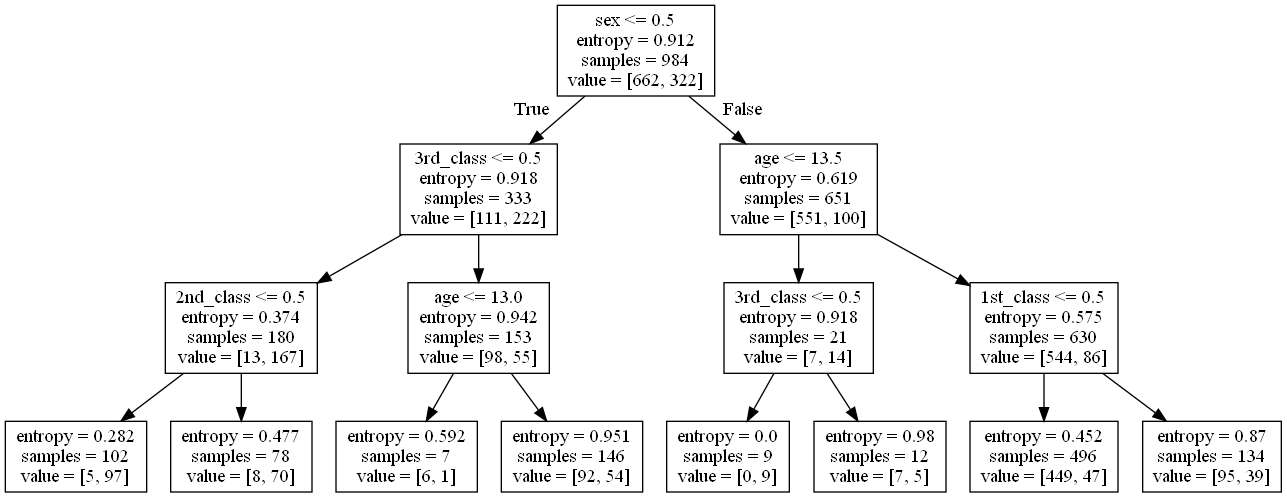

In [58]:
# 加载图形
from IPython.core.display import Image 
Image(filename='titanic1.png')

In [59]:
# 获取几个数据
len(X_train), sum(y_train==0),sum(y_train==1) # 984 个样本，遇难人数 662，生还人数 322

(984, 662, 322)

### 14.3.14 决策树解读


- 决策树算法的关键 —— 如何获得最优划分属性
    - 最优划分属性 —— 对于二元分类而言，就是尽量使划分的样本属于同一类别，即“纯度”最高的属性


- 如何度量特征（features）的纯度 —— 采用“信息熵（information entropy）”


- 信息熵的定义
    - 假如当前样本集 $D$ 中第 $k$ 类样本所占的比例为 $p_k(k=1,2,\cdots,K)，$K$ 为类别的总数（对于二元分类问题，$K=2$）
    - 样本集的信息熵为
    $$Ent(D)=-\sum_{k=1}^{K}{p_k\log_2 {p_k}}$$
    - 信息熵的值越小，意味着样本集的纯度越高


- 内节点
    - 第一行：测试条件
        - True 左分支
        - Flase 右分支
    - entropy 熵 —— 越大越乱，越理不清头绪
    - samples 样本数
    - value = [num_death, num_live]


- 根节点
    - $sex \le 0.5?$ 测试是女人吗？


- 连续测试......

### 14.3.15 常见评估函数


- 预测情况表

|   目标     |     预测：正    |     预测：负     |
| :------------: |  :-----------------:  |  :------------------:  |
|   目标：正  |  True Positive(TP)  |  False Negative(FN)  |
|   目标：负  |  False Positive(FP) |  True Negative(TN)   |



- 记样本总数为

$$m = TP+TN+FP+FN$$


- 三个常用评估函数 —— 适用于二元分类（正、负）识别问题
    $$Precision = \dfrac{TP}{TP+FP}$$
    
    $$Recall = \dfrac{TP}{TP+FN}$$
    
    $$F1\!-\!score = \dfrac{2\times Precision \times Recall}{Precision + Recall}$$


- 检验训练集的计算效果
    $$Accuracy = \dfrac{TP+TN}{m}$$


- 定义测试函数

```python
>>> measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True)
```

In [60]:
from sklearn import metrics

def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    y_pred=clf.predict(X)   

    if show_accuracy:
        print ("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")

    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(y, y_pred),"\n")
        
    if show_confusion_matrix:
        print ("Confusion matrix")
        print (metrics.confusion_matrix(y, y_pred),"\n")

In [61]:
# 输出精度得分
measure_performance(X_train, y_train, clf, show_classification_report=True, show_confusion_matrix=True)

Accuracy:0.838 

Classification report
              precision    recall  f1-score   support

         0.0       0.82      0.98      0.89       662
         1.0       0.93      0.55      0.69       322

    accuracy                           0.84       984
   macro avg       0.87      0.76      0.79       984
weighted avg       0.85      0.84      0.82       984
 

Confusion matrix
[[649  13]
 [146 176]] 



In [62]:
# 输出精度得分
measure_performance(X_test, y_test, clf, show_classification_report=True, show_confusion_matrix=True)

Accuracy:0.793 

Classification report
              precision    recall  f1-score   support

         0.0       0.77      0.96      0.85       202
         1.0       0.88      0.54      0.67       127

    accuracy                           0.79       329
   macro avg       0.82      0.75      0.76       329
weighted avg       0.81      0.79      0.78       329
 

Confusion matrix
[[193   9]
 [ 59  68]] 



### 14.3.16 弃一法交叉验证（leave-one-out cross-validation） —— CV 的极端情况

- 对于每一个训练样本实例（instance），训练余下的样本，用仅有的这个实例测试（test）。

- 所有识别结束后，简单地计算识别精度（正确率）

- 发现比预期（Accuracy）稍低

### 补充知识（三种交叉验证的方法）：
#### （1）简单的交叉验证hold -out cross validation：
- 1、从全部的训练数据 S中随机选择 中随机选择 s的样例作为训练集 train，剩余的 作为测试集 作为测试集 test。
- 2、通过对测试集训练 ，得到假设函数或者模型 。
- 3、在测试集对每一个样本根据假设函数或者模型，得到训练集的类标，求出分类正确率。
- 4、选择具有最大分类率的模型或者假设。  
这种方法称为 hold -out cross validation 或者称为简单交叉验证。由于测试集和训练集是分开的，就避免了过拟合的现象
<img src="images\ch14\ch14-07.jpg" width = 500>  
<img src="images\ch14\ch14-09.jpg" width = 500>  

#### （2）k折交叉验证 k-fold cross validation
- 1、 将全部训练集 S分成 k个不相交的子集，假设 S中的训练样例个数为 m，那么每一个子 集有 m/k 个训练样例，，相应的子集称作 {s1,s2,…,sk}。
- 2、每次从分好的子集中里面，拿出一个作为测试集，其它k-1个作为训练集
- 3、根据训练训练出模型或者假设函数。
- 4、 把这个模型放到测试集上，得到分类率。
- 5、计算k次求得的分类率的平均值，作为该模型或者假设函数的真实分类率。  
这个方法充分利用了所有样本。但计算比较繁琐，需要训练k次，测试k次。  
<img src="images\ch14\ch14-11.jpg" width = 500>    
#### （3）弃一法  leave-one-out cross validation（有的文献叫留一法）
- 弃一法就是每次只留下一个样本做测试集，其它样本做训练集，如果有k个样本，则需要训练k次，测试k次。
- 弃一法计算最繁琐，但样本利用率最高。适合于小样本的情况。  
<img src="images\ch14\ch14-10.jpg" width = 500> 

In [63]:
# 导入 cross_val_score, LeaveOneOut
from sklearn.model_selection import cross_val_score, LeaveOneOut
# 导入 sem 用于统计计算
from scipy.stats import sem

In [64]:
LeaveOneOut?

In [65]:
XX = np.array([[1, 2], [3, 4], [5,6]])
yy = np.array([1, 2, 3])
loo = LeaveOneOut()  #LeaveOneOut(n) , n is Total number of elements in dataset.
loo.get_n_splits(XX)

3

In [66]:
loo  ##############################

LeaveOneOut()

In [67]:
for train_index, test_index in loo.split(XX):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train1, X_test1 = XX[train_index], XX[test_index]
    y_train1, y_test1 = yy[train_index], yy[test_index]
    print(X_train1, X_test1, y_train1, y_test1)

TRAIN: [1 2] TEST: [0]
[[3 4]
 [5 6]] [[1 2]] [2 3] [1]
TRAIN: [0 2] TEST: [1]
[[1 2]
 [5 6]] [[3 4]] [1 3] [2]
TRAIN: [0 1] TEST: [2]
[[1 2]
 [3 4]] [[5 6]] [1 2] [3]


In [68]:
# 回到主题

In [69]:
def loo_cv(X_train,y_train,clf):
    # 进行弃一法交叉验证
    # 1313 次分类识别
    loo = LeaveOneOut()
    scores=np.zeros(X_train[:].shape[0])
    for train_index,test_index in loo.split(X_train):
        X_train_cv, X_test_cv= X_train[train_index], X_train[test_index]
        y_train_cv, y_test_cv= y_train[train_index], y_train[test_index]
        clf = clf.fit(X_train_cv,y_train_cv)
        y_pred=clf.predict(X_test_cv)
        scores[test_index]=metrics.accuracy_score(y_test_cv.astype(int), y_pred.astype(int))

    print(np.mean(scores)) # 计算均值
    print(sem(scores))     # 计算标准误差
    print ("Mean score: {0:.3f} (+/-{1:.3f})".format(np.mean(scores), sem(scores)))

In [70]:
loo_cv(X_train, y_train,clf)

0.8373983739837398
0.011769329990114298
Mean score: 0.837 (+/-0.012)


## 14.4 鸢尾花案例

In [71]:
# 引入数据
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [72]:
iris = load_iris()

In [73]:
X = iris.data[:,2:]  #petal length and width
y = iris.target

In [74]:
tree_clf = DecisionTreeClassifier(max_depth = 5)

In [75]:
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=5)

In [76]:
from sklearn.tree import export_graphviz

tree.export_graphviz(
    tree_clf,
    out_file = "iris_tree.dot",
    feature_names = iris.feature_names[2:],
    class_names = iris.target_names,
    rounded =  True,
    filled = True
)

In [77]:
!dot -Tpng iris_tree.dot -o iris_tree.png

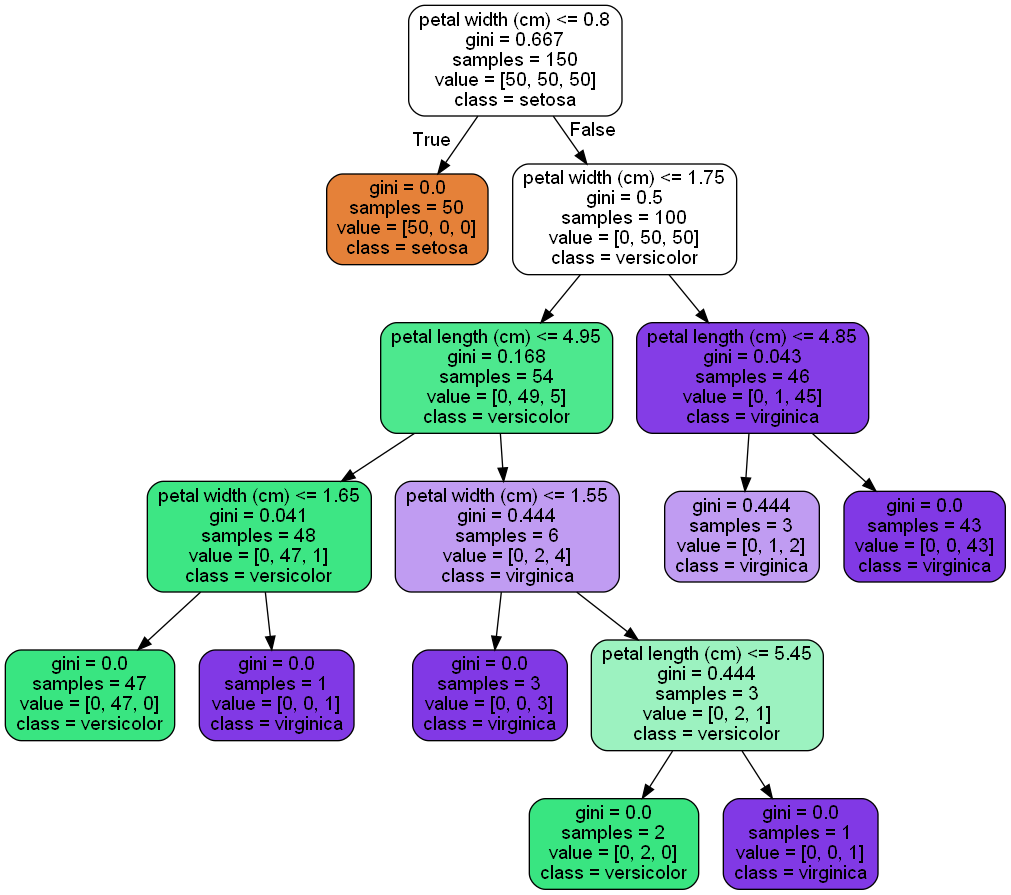

In [78]:
from IPython.core.display import Image 
Image(filename='iris_tree.png')

In [79]:
from sklearn import metrics

def measure_performance(X, y, clf = tree_clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    y_pred=clf.predict(X)   

    if show_accuracy:
        print ("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")

    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(y, y_pred),"\n")
        
    if show_confusion_matrix:
        print ("Confusion matrix")
        print (metrics.confusion_matrix(y, y_pred),"\n")

In [80]:
# 输出精度得分
measure_performance(X, y, tree_clf, show_classification_report=True, show_confusion_matrix=True)

Accuracy:0.993 

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.98      0.99        50
           2       0.98      1.00      0.99        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150
 

Confusion matrix
[[50  0  0]
 [ 0 49  1]
 [ 0  0 50]] 



In [81]:
# 定义图像中分区颜色
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [82]:
# 分别用样本的两个特征值创建图像的横轴和纵轴
x_min, x_max = X[:, 0].min() - 1,  X[:,0].max()+1
y_min, y_max = X[:, 1].min() - 1,  X[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min, x_max, .02),
                   np.arange(y_min, y_max, .02))

In [83]:
Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])

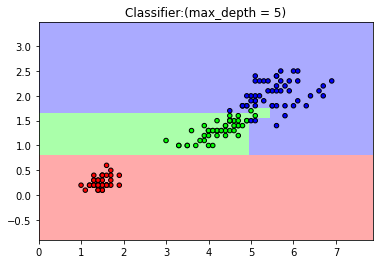

In [84]:
# 给每个分类的样本分析不同的颜色
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

#用散点把样本表示出来
plt.scatter(X[:,0], X[:,1],c=y,  cmap=cmap_bold, edgecolor = 'k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier:(max_depth = 5)")

plt.show()

In [85]:
tree_clf3 = DecisionTreeClassifier(max_depth = 3)

In [86]:
tree_clf3.fit(X,y)

DecisionTreeClassifier(max_depth=3)

In [87]:
from sklearn.tree import export_graphviz

tree.export_graphviz(
    tree_clf3,
    out_file = "iris_tree3.dot",
    feature_names = iris.feature_names[2:],
    class_names = iris.target_names,
    rounded =  True,
    filled = True
)

In [88]:
!dot -Tpng iris_tree3.dot -o iris_tree3.png

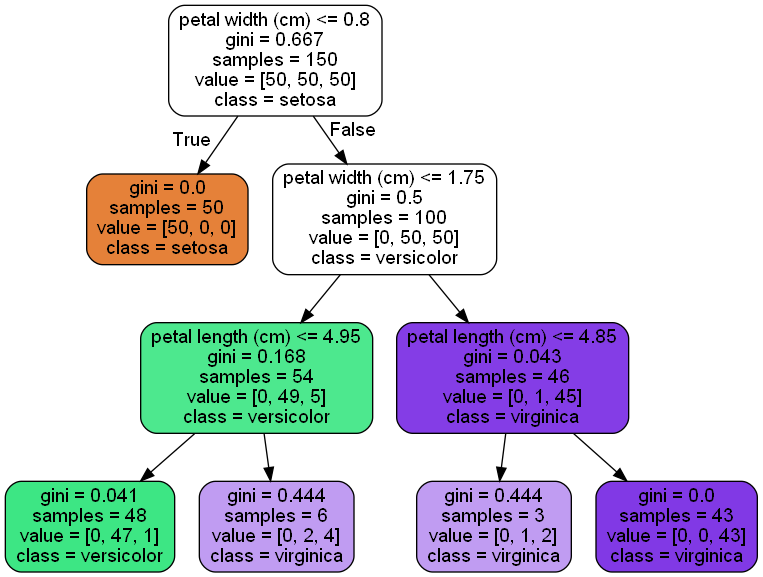

In [89]:
from IPython.core.display import Image 
Image(filename='iris_tree3.png')

In [90]:
# 输出精度得分
measure_performance(X, y, tree_clf3, show_classification_report=True, show_confusion_matrix=True)

Accuracy:0.973 

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150
 

Confusion matrix
[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]] 



In [91]:
#绘图
Z = tree_clf3.predict(np.c_[xx.ravel(), yy.ravel()])

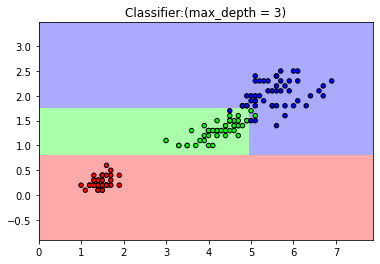

In [92]:
# 给每个分类的样本分析不同的颜色
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

#用散点把样本表示出来
plt.scatter(X[:,0], X[:,1],c=y,  cmap=cmap_bold, edgecolor = 'k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier:(max_depth = 3)")

plt.show()

In [93]:
tree_clf4 = DecisionTreeClassifier(max_depth = 4)

In [94]:
tree_clf4.fit(X,y)

DecisionTreeClassifier(max_depth=4)

In [95]:
from sklearn.tree import export_graphviz

tree.export_graphviz(
    tree_clf4,
    out_file = "iris_tree4.dot",
    feature_names = iris.feature_names[2:],
    class_names = iris.target_names,
    rounded =  True,
    filled = True
)

In [96]:
!dot -Tpng iris_tree4.dot -o iris_tree4.png

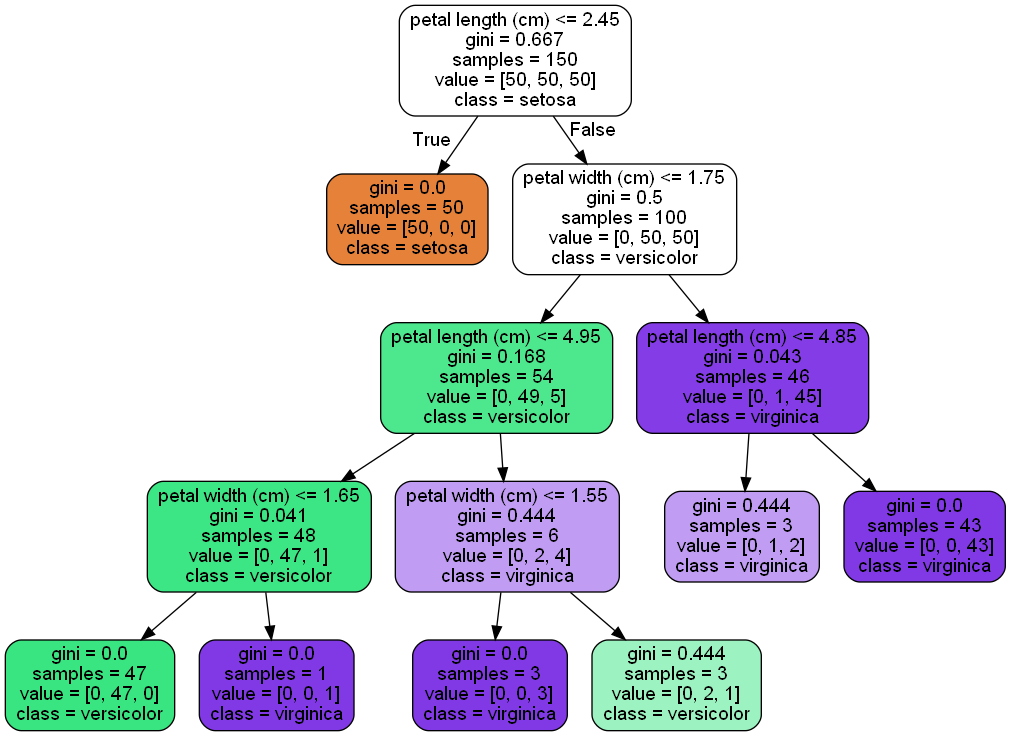

In [97]:
from IPython.core.display import Image 
Image(filename='iris_tree4.png')

In [98]:
# 输出精度得分
measure_performance(X, y, tree_clf4, show_classification_report=True, show_confusion_matrix=True)

Accuracy:0.987 

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.98      0.98        50
           2       0.98      0.98      0.98        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150
 

Confusion matrix
[[50  0  0]
 [ 0 49  1]
 [ 0  1 49]] 



In [99]:
# 绘图
Z = tree_clf4.predict(np.c_[xx.ravel(), yy.ravel()])

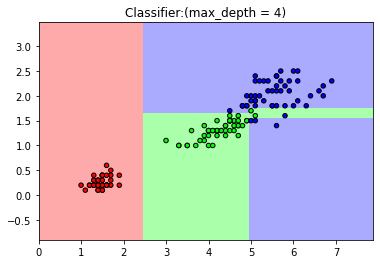

In [100]:
# 给每个分类的样本分析不同的颜色
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

#用散点把样本表示出来
plt.scatter(X[:,0], X[:,1],c=y,  cmap=cmap_bold, edgecolor = 'k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier:(max_depth = 4)")

plt.show()

## 14.5 葡萄酒识别

### 14.5.1 决策树

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import tree, datasets
from sklearn.model_selection import train_test_split
wine = datasets.load_wine()
X = wine.data[:,:2]
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y)
X

array([[14.23,  1.71],
       [13.2 ,  1.78],
       [13.16,  2.36],
       [14.37,  1.95],
       [13.24,  2.59],
       [14.2 ,  1.76],
       [14.39,  1.87],
       [14.06,  2.15],
       [14.83,  1.64],
       [13.86,  1.35],
       [14.1 ,  2.16],
       [14.12,  1.48],
       [13.75,  1.73],
       [14.75,  1.73],
       [14.38,  1.87],
       [13.63,  1.81],
       [14.3 ,  1.92],
       [13.83,  1.57],
       [14.19,  1.59],
       [13.64,  3.1 ],
       [14.06,  1.63],
       [12.93,  3.8 ],
       [13.71,  1.86],
       [12.85,  1.6 ],
       [13.5 ,  1.81],
       [13.05,  2.05],
       [13.39,  1.77],
       [13.3 ,  1.72],
       [13.87,  1.9 ],
       [14.02,  1.68],
       [13.73,  1.5 ],
       [13.58,  1.66],
       [13.68,  1.83],
       [13.76,  1.53],
       [13.51,  1.8 ],
       [13.48,  1.81],
       [13.28,  1.64],
       [13.05,  1.65],
       [13.07,  1.5 ],
       [14.22,  3.99],
       [13.56,  1.71],
       [13.41,  3.84],
       [13.88,  1.89],
       [13.

In [102]:
# 设定最大深度为1
clf = tree.DecisionTreeClassifier(max_depth = 1)

In [103]:
# 拟合训练数据集
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [104]:
# 定义图像中分区颜色
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [105]:
# 分别用样本的两个特征值创建图像的横轴和纵轴
x_min, x_max = X_train[:, 0].min() - 1,  X_train[:,0].max()+1
y_min, y_max = X_train[:, 1].min() - 1,  X_train[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min, x_max, .02),
                   np.arange(y_min, y_max, .02))

In [106]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

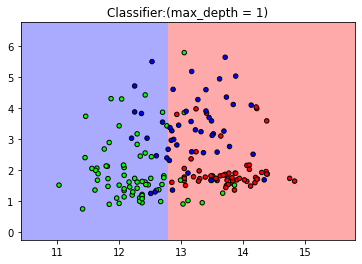

In [107]:
# 给每个分类的样本分析不同的颜色
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

#用散点把样本表示出来
plt.scatter(X[:,0], X[:,1],c=y,  cmap=cmap_bold, edgecolor = 'k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier:(max_depth = 1)")

plt.show()

#### 分析一下结果：
- 最大深度为1时，分类器表现不是特别好，分类器只分了两类

#### 试试最大深度3

In [108]:
# 设定最大深度为1
clf2 = tree.DecisionTreeClassifier(max_depth = 3)
# 拟合训练数据集
clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

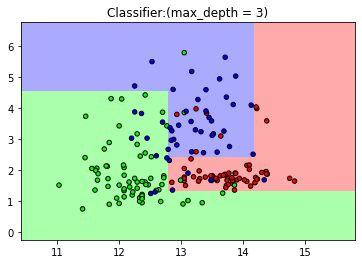

In [109]:
# 定义图像中分区颜色
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# 分别用样本的两个特征值创建图像的横轴和纵轴
x_min, x_max = X_train[:, 0].min() - 1,  X_train[:,0].max()+1
y_min, y_max = X_train[:, 1].min() - 1,  X_train[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min, x_max, .02),
                   np.arange(y_min, y_max, .02))

Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])

# 给每个分类的样本分析不同的颜色
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

#用散点把样本表示出来
plt.scatter(X[:,0], X[:,1],c=y,  cmap=cmap_bold, edgecolor = 'k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier:(max_depth = 3)")

plt.show()

In [110]:
from sklearn import metrics

def measure_performance(X, y, clf = clf2, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    y_pred=clf.predict(X)   

    if show_accuracy:
        print ("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")

    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(y, y_pred),"\n")
        
    if show_confusion_matrix:
        print ("Confusion matrix")
        print (metrics.confusion_matrix(y, y_pred),"\n")

In [111]:
# 输出精度得分
measure_performance(X_train, y_train, clf2, show_classification_report=True, show_confusion_matrix=True)

Accuracy:0.857 

Classification report
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        44
           1       0.88      0.91      0.89        56
           2       0.77      0.73      0.75        33

    accuracy                           0.86       133
   macro avg       0.85      0.84      0.84       133
weighted avg       0.86      0.86      0.86       133
 

Confusion matrix
[[39  0  5]
 [ 3 51  2]
 [ 2  7 24]] 



#### 再分析一下结果：
- 最大深度为3时，分类器能够进行3个分类识别，大部分正确了。

#### 试试最大深度5

In [112]:
# 设定最大深度为1
clf3 = tree.DecisionTreeClassifier(max_depth = 5)
# 拟合训练数据集
clf3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

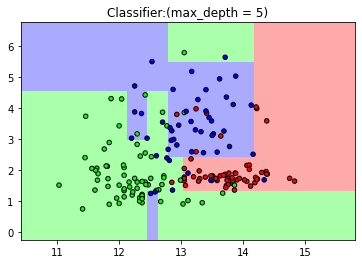

In [113]:
# 定义图像中分区颜色
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# 分别用样本的两个特征值创建图像的横轴和纵轴
x_min, x_max = X_train[:, 0].min() - 1,  X_train[:,0].max()+1
y_min, y_max = X_train[:, 1].min() - 1,  X_train[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min, x_max, .02),
                   np.arange(y_min, y_max, .02))

Z = clf3.predict(np.c_[xx.ravel(), yy.ravel()])

# 给每个分类的样本分析不同的颜色
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

#用散点把样本表示出来
plt.scatter(X[:,0], X[:,1],c=y,  cmap=cmap_bold, edgecolor = 'k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier:(max_depth = 5)")

plt.show()

#### 再分析一下结果：
- 最大深度为5时，分类器更加努力地提升性能

#### 利用graphviz看看决策过程

In [123]:
#import graphviz
#导入决策树中的输出graphviz接口
from sklearn.tree import export_graphviz
#选择最大深度为3的分类模型
export_graphviz(clf2, out_file = "wine.dot", class_names = wine.target_names,
               feature_names = wine.feature_names[:2], impurity = False, filled = True)
#打开dot文件
with open("wine.dot") as f:
    dot_graph = f.read()
    #显示dot文件中的图形
#graphviz.Source(dot_graph)


In [125]:
from sklearn import metrics

def measure_performance(X, y,clf = clf3, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    y_pred=clf.predict(X)   

    if show_accuracy:
        print ("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")

    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(y, y_pred),"\n")
        
    if show_confusion_matrix:
        print ("Confusion matrix")
        print (metrics.confusion_matrix(y, y_pred),"\n")

In [126]:
# 输出精度得分
measure_performance(X_train, y_train, clf3, show_classification_report=True, show_confusion_matrix=True)

Accuracy:0.895 

Classification report
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        44
           1       0.95      0.93      0.94        56
           2       0.80      0.85      0.82        33

    accuracy                           0.89       133
   macro avg       0.88      0.89      0.89       133
weighted avg       0.90      0.89      0.90       133
 

Confusion matrix
[[39  0  5]
 [ 2 52  2]
 [ 2  3 28]] 



In [127]:
!dot -Tpng wine.dot -o wine.png

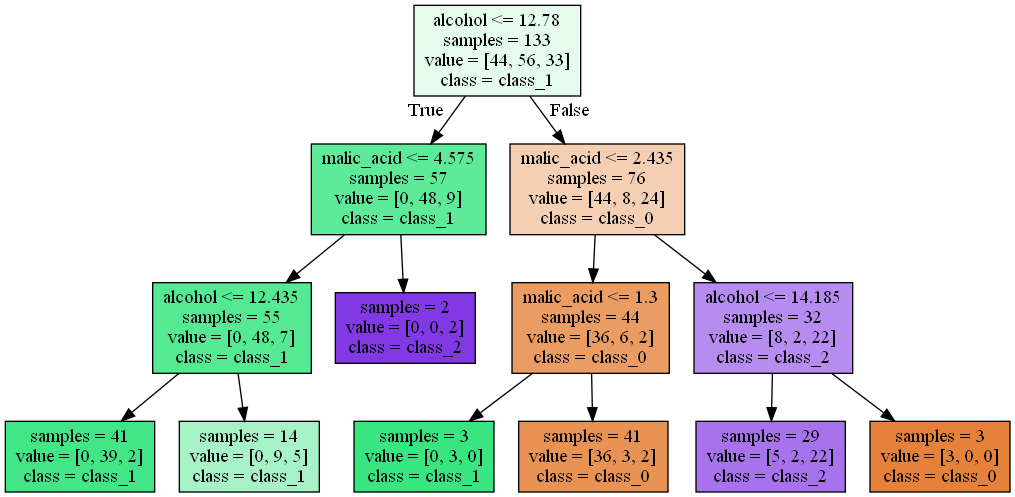

In [128]:
from IPython.core.display import Image 
Image(filename='wine.png')

### 结果分析
- 决策树从根开始看
- 酒精度<=12.78   有133个样本，value= [45,52,36]表示有45个属于class_0,其他类推
- 当酒精度>12.78时，样本81个，再判断苹果酸<=2.235,判为class_0有81个，类推下去

### 14.5.2 随机森林

In [129]:
# 导入随机森林模型
from sklearn.ensemble import RandomForestClassifier
#载入数据
wine = datasets.load_wine()
#选择前两个特征
X = wine.data[:,:2]
y = wine.target
#拆分
X_train, X_test, y_train, y_test = train_test_split(X, y)
# 设定森林中有6棵树
forest = RandomForestClassifier(n_estimators =  6, random_state = 3 )
# 使用模型拟合数据
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=6, random_state=3)

#### 随机森林返回了包含自身参数的全部信息
- bootstrap，代表bootstrap sample，表示有`放回抽样 `的意思
- 原始样本a,b,c,d,可能抽出来 a,a,b,c 或者 a,d,c,d,随意随机森林的每棵树决策出来会不同


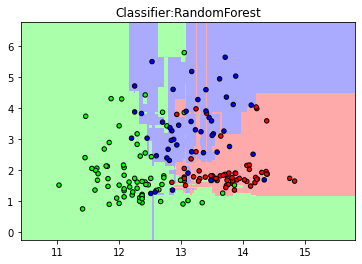

In [130]:
# 定义图像中分区颜色
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# 分别用样本的两个特征值创建图像的横轴和纵轴
x_min, x_max = X_train[:, 0].min() - 1,  X_train[:,0].max()+1
y_min, y_max = X_train[:, 1].min() - 1,  X_train[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min, x_max, .02),
                   np.arange(y_min, y_max, .02))
Z = forest.predict(np.c_[xx.ravel(), yy.ravel()])

# 给每个分类的样本分析不同的颜色
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

#用散点把样本表示出来
plt.scatter(X[:,0], X[:,1],c=y,  cmap=cmap_bold, edgecolor = 'k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier:RandomForest")

plt.show()

In [131]:
from sklearn import metrics

def measure_performance(X, y, clf = forest, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    y_pred=clf.predict(X)   

    if show_accuracy:
        print ("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")

    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(y, y_pred),"\n")
        
    if show_confusion_matrix:
        print ("Confusion matrix")
        print (metrics.confusion_matrix(y, y_pred),"\n")

In [132]:
# 输出精度得分
measure_performance(X_train, y_train, forest, show_classification_report=True, show_confusion_matrix=True)

Accuracy:0.962 

Classification report
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        43
           1       0.96      0.98      0.97        50
           2       1.00      0.90      0.95        40

    accuracy                           0.96       133
   macro avg       0.97      0.96      0.96       133
weighted avg       0.96      0.96      0.96       133
 

Confusion matrix
[[43  0  0]
 [ 1 49  0]
 [ 2  2 36]] 



#### 结果分析：
- 随机森林分类更加细致
- 随机森林集成了决策树的所有优点，而且能够弥补决策树的不足
- 随机森林没课决策树的层级比决策树更深，如果向非专业人士展示，还需要决策树
- 随机森林支持并行计算，n_jobs = CPU内核数，或者 = -1，用满核
- 超高维数据、稀疏数据集，随机森林有些捉襟见肘，线性模型好于随机森林。
- 随机森林比线性模型要慢


## 14.6 要不要和相亲对象进一步发展（太势利了）

http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adault.data

In [133]:
import pandas as pd
column_names = ['age','workclass', 'fnlwgt', 'education', 'education-num','marital-status','occupation','relationship','race','sex',
'capital-gain','capital-loss','hours-per-week','native-country','salary']

data = pd.read_csv('data/adult.data',index_col=False,names=column_names)
data_lite = data[['age', 'workclass', 'education', 'sex', 'hours-per-week','occupation','salary']]
data_lite.tail()

,age,workclass,education,sex,hours-per-week,occupation,salary
32556,27,Private,Assoc-acdm,Female,38,Tech-support,<=50K
32557,40,Private,HS-grad,Male,40,Machine-op-inspct,>50K
32558,58,Private,HS-grad,Female,40,Adm-clerical,<=50K
32559,22,Private,HS-grad,Male,20,Adm-clerical,<=50K
32560,52,Self-emp-inc,HS-grad,Female,40,Exec-managerial,>50K


In [134]:
#get_dummies处理数据
data_dummies = pd.get_dummies(data_lite)
print('样本原始特征:\n', list(data_lite.columns),'\n')
print("虚拟变量特征:\n", list(data_dummies.columns))

样本原始特征:
 ['age', 'workclass', 'education', 'sex', 'hours-per-week', 'occupation', 'salary'] 

虚拟变量特征:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'sex_ Female', 'sex_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'oc

- get_dummies，把字符串的特征拆分开，比如workclass->
    - workclass_ Never-worked
    - workclass_ Federal-gov
    - etc.

In [135]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,salary_ <=50K,salary_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [136]:
features = data_dummies.loc[:,'age':'occupation_ Transport-moving']

In [137]:
X = features.values

In [138]:
y = data_dummies['salary_ >50K'].values
print('代码运行结果')
print('==============')
print('特征形态:{0} 标签形态:{1}'.format(X.shape,y.shape))

代码运行结果
特征形态:(32561, 44) 标签形态:(32561,)


In [139]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)
go_dating_tree = tree.DecisionTreeClassifier(max_depth = 5)
go_dating_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [140]:
print('模型得分:{:.2f}'.format(go_dating_tree.score(X_test,  y_test)))

模型得分:0.80


In [141]:
Mr_Z = [[37, 40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0]]

In [142]:
dating_dec = go_dating_tree.predict(Mr_Z)
print("代码运行结果：")
if dating_dec ==1:
    print("大胆去追吧，这哥们月薪过万！")
else:
    print("不用去了，不满足你的要求")

代码运行结果：
不用去了，不满足你的要求


## 14.7 小结


- 决策树
    - 基本概念
    - 节点与分支
    - 算法流程


- Titanic 号生还预测
    - 问题简介
    - 数据集导入
    - 数据预处理
    - 数据取舍 —— 留年龄、性别、客舱等级
    - 处理丢失数据
    - 文本信息数值化
        - 标签 LabelEncoder
        - 独热 OneHotLabel
    - 数据分割
    - 决策树分类识别
    - 可视化显示
    - 决策树解读
    - 常见评估函数三个
    - 弃一法交叉验证
    - 评估测试集
- 其他案例：鸢尾花 + 葡萄酒 等

### 第14讲 结束